# HISTOGRAMA DE UMA IMAGEM

## Histograma

O histograma de uma imagem é um gráfico que representa a distribuição de intensidades de pixel em uma imagem. Ele mostra quantos pixels possuem uma determinada intensidade (valor de cor), ajudando a entender a exposição, contraste e a gama tonal da imagem.

### Para que serve:


- Analisar a distribuição de cores ou tons de cinza.
- Ajustar brilho e contraste da imagem.
- Identificar regiões escuras ou claras.
- Auxiliar na limiarização e segmentação.
- Detecção de problemas de iluminação.

### Como funciona:

- Cada pixel de uma imagem possui uma intensidade de cor (em escala de cinza, vai de 0 a 255).

- O histograma conta o número de pixels para cada intensidade.

- É apresentado como um gráfico de frequência:
    - <b>Eixo X:</b> Intensidade do pixel (0 = preto, 255 = branco).
    - <b>Eixo Y:</b> Número de pixels para cada intensidade.

### Tipos:

- <b>Histograma de imagem em tons de cinza:</b> Mostra a distribuição de intensidades de 0 a 255.

- <b>Histograma de imagem colorida:</b> Exibe três gráficos separados (um para cada canal – vermelho, verde, azul).

### Exemplo:

- <b>Imagem escura:</b> Pico no lado esquerdo (intensidades baixas).

- <b>Imagem clara:</b> Pico no lado direito (intensidades altas).

- <b>Imagem de alto contraste:</b> Distribuição ampla ao longo de todo o gráfico.

## Code:

In [2]:
# Importando as bibliotecas

import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Leitura da imagem e conversão para escala de cinza

image = cv2.imread('../images/lena.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [4]:
def calcule_hist(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])

    plt.plot(hist, color='black')
    plt.title('Histograma - gray image')
    plt.xlabel('Instensidade de pixels (0 a 255)')
    plt.ylabel('Quantidade de pixels')
    plt.xlim(0, 255)  # Ajusta o eixo X para começar em 0 e terminar em 255
    plt.show()

In [5]:
def return_hist(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])

    return hist

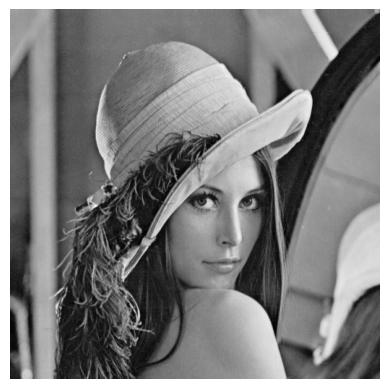

In [6]:
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

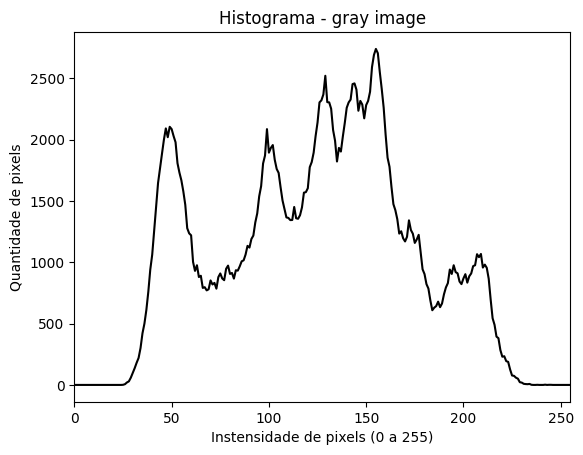

In [7]:
calcule_hist(image)

## Equalização de Histograma

A equalização de histograma é uma técnica usada para melhorar o contraste de uma imagem, redistribuindo os níveis de intensidade de pixel para ocupar todo o espectro possível (0 a 255). Isso faz com que a imagem fique mais equilibrada em termos de brilho e contraste.

### Para que serve:


- Melhorar imagens muito escuras ou muito claras.

- Destacar detalhes que estavam "escondidos" por baixa iluminação.

- Usada em áreas como processamento médico (tomografias, radiografias), fotografia digital e visão computacional.

### Como funciona:

1. O histograma da imagem original pode estar concentrado em uma faixa estreita de intensidades.
    - Exemplo: Uma imagem escura tem muitos pixels entre 0 e 50.

2. A equalização "espalha" as intensidades, distribuindo-as uniformemente.
    - Resultado: Melhora o contraste e revela mais detalhes.


> A equalização é uma técnica não-paramétrica, o que significa que não depende de parâmetros ajustáveis. O resultado é consistente para qualquer imagem com a mesma distribuição de intensidade.



In [8]:
# Equalização de histograma via opencv

equalized_image = cv2.equalizeHist(image)

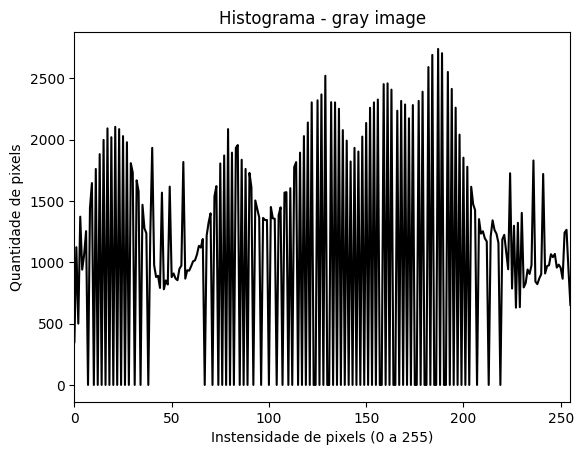

In [9]:
# Visualizando o histograma da imagem equalizada

calcule_hist(equalized_image)

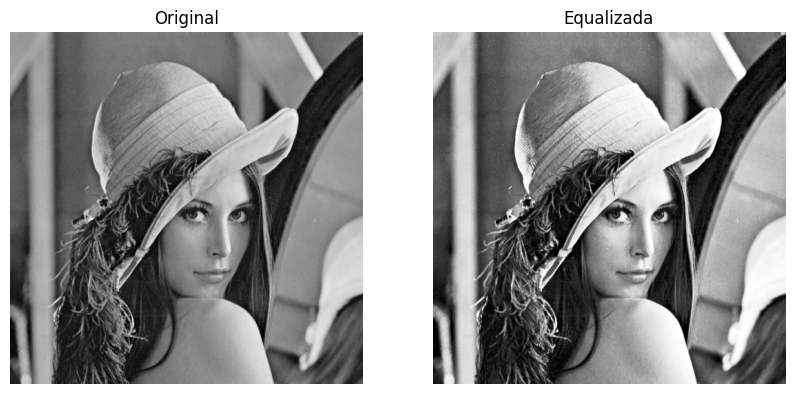

In [10]:
# Comparando a imagem original com a equalizada

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalizada')
plt.axis('off')

plt.show()

> Percebam que a imagem equalizada tem um contraste maior e mais uniforme. Isso ocorre porque a equalização distribui as intensidades de forma mais uniforme, resultando em uma imagem mais clara e com mais detalhes.

## Limiarização

### Para que serve:


- <b>Segmentação de imagens</b> – separar o objeto do fundo.

- <b>Reconhecimento de formas</b> – facilitar a detecção de contornos.

- <b>Reduzir ruído ou detalhes irrelevantes</b> – simplificar a imagem.

- <b>Detecção de bordas</b> – melhorar a análise estrutural de uma imagem.

### Como funciona:

<b>Análise do Histograma:</b>

- O histograma mostra a distribuição de intensidades dos pixels da imagem (de 0 a 255, em imagens em tons de cinza).

- A ideia é identificar um valor de limiar que separa a parte clara (objetos) da parte escura (fundo).

<b>Definição do Limiar:</b>

- Um valor de limiar 𝑇 é escolhido.

- Todos os pixels com intensidade abaixo de 𝑇 se tornam pretos (0), e acima de 𝑇 se tornam brancos (255).

<b>Aplicação do Limiar:</b>

- Resultado: Imagem binária onde o objeto e o fundo estão claramente separados.

In [11]:
def thresholding(image, valor):
    # 127 é o valor do limiar
    # 255 é o valor máximo de intensidade de pixel
    # cv2.THRESH_BINARY é o tipo de limiarização
    # _ é o valor do limiar
    # thresh é a imagem limiarizada
    _, thresh = cv2.threshold(image, valor, 255, cv2.THRESH_BINARY )
    return thresh

In [12]:
# Limiarizando a imagem com um valor de limiar de 100
threshold_image = thresholding(image, 100)

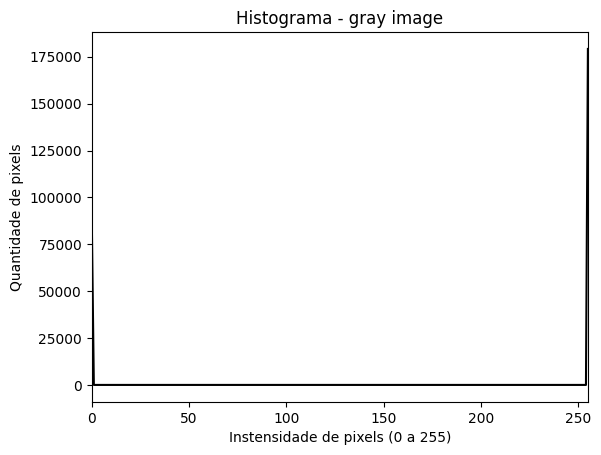

In [13]:
# Visualizando o histograma da imagem limiarizada
calcule_hist(threshold_image)

Text(0.5, 1.0, 'Original')

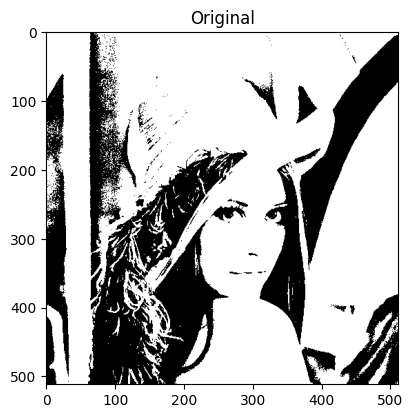

In [14]:

# Visualizando a imagem limiarizada
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(threshold_image, cmap='gray')
plt.title('Original')

### Exemplos práticos

In [22]:
name_image = cv2.imread('../images/name.png')
name_image = cv2.cvtColor(name_image, cv2.COLOR_BGR2RGB)
name_image = cv2.cvtColor(name_image, cv2.COLOR_RGB2GRAY)

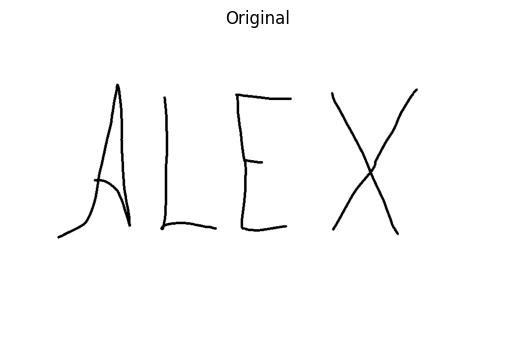

In [23]:
plt.imshow(name_image, cmap='gray')
plt.title('Original')
plt.axis('off')
plt.show()



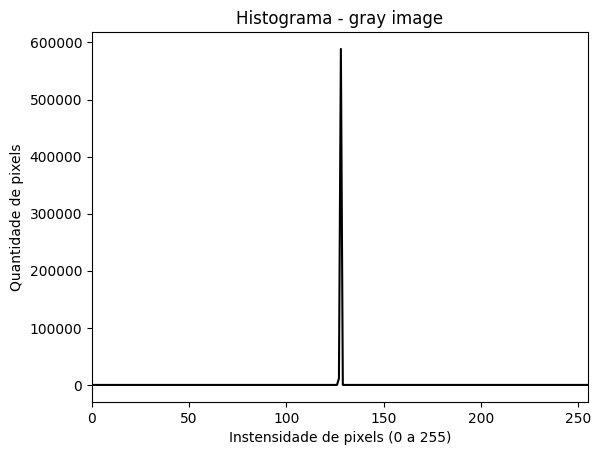

In [24]:
calcule_hist(name_image)

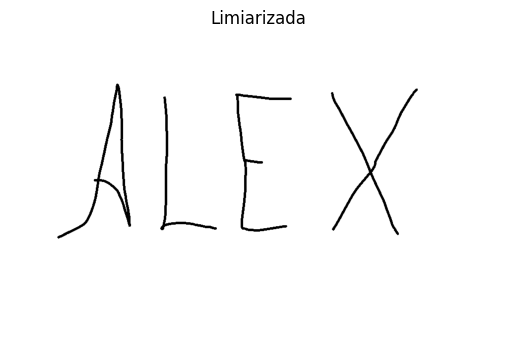

In [26]:
threshold_name_image = thresholding(name_image, 127)

plt.imshow(threshold_name_image, cmap='gray')
plt.title('Limiarizada')
plt.axis('off')
plt.show()

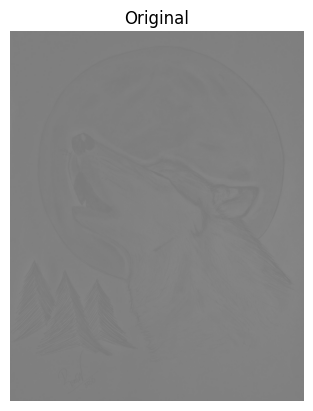

In [32]:
wolf_image = cv2.imread('../images/wolf.png')
plt.imshow(wolf_image)
plt.title('Original')
plt.axis('off')
plt.show()


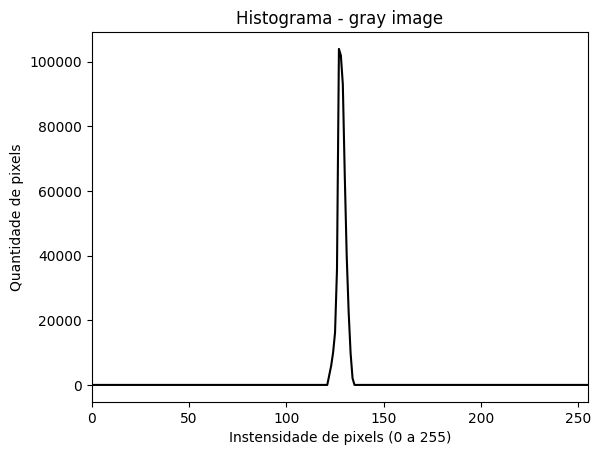

In [35]:
calcule_hist(wolf_image)

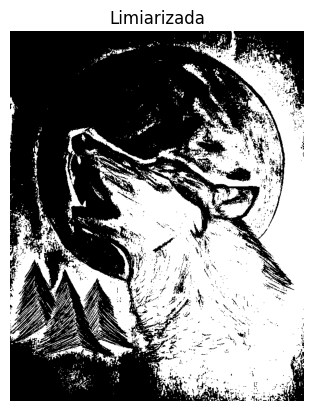

In [34]:
threshold_wolf_image = thresholding(wolf_image, 128)
plt.imshow(threshold_wolf_image)
plt.title('Limiarizada')
plt.axis('off')
plt.show()

In [ ]:
# Aplicando filtro morfologico para afinamento de letras e numeros
